In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
from pandas.api.types import is_string_dtype, is_object_dtype
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [20]:
from xgboost import XGBRegressor

In [21]:
df = pd.read_csv("data/phycocyanin-approximator-project-dataset(Sheet2).csv", encoding= "windows-1252")
df.head()

,microorganism,extraction solvent,pH,conc(M),freeze-thaw cycles,purity
0,sp,sodium phosphate,6.0,0.5,1,0.27
1,sp,sodium phosphate,6.5,0.5,1,0.67
2,sp,sodium phosphate,7.0,0.5,1,0.30
3,sp,tris-hcl,7.0,1.0,1,0.62
4,sp,tris-hcl,7.5,1.0,1,0.57


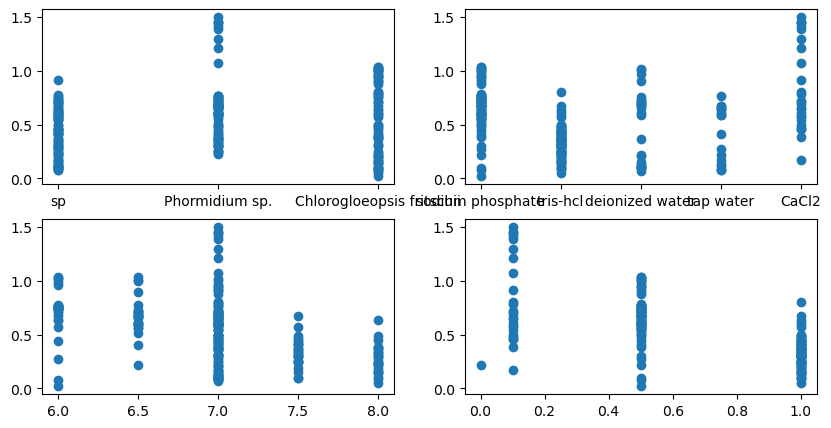

In [7]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,
                                          ncols=2,
                                          figsize=(10,5))

ax1.scatter(df["microorganism"],df["purity"])
ax2.scatter(df["extraction solvent"], df["purity"])
ax3.scatter(df["pH"], df["purity"])
ax4.scatter(df["conc(M)"], df["purity"])


In [8]:
df["microorganism"] = df["microorganism"].str.replace('[ \.]','', regex=True)
df["extraction solvent"] = df["extraction solvent"].str.replace('[ \-]','', regex=True)

In [9]:
# check-1: whether non alphanumeric values were converted

df.head()

,microorganism,extraction solvent,pH,conc(M),freeze-thaw cycles,purity
0,sp,sodiumphosphate,6.0,0.5,1,0.27
1,sp,sodiumphosphate,6.5,0.5,1,0.67
2,sp,sodiumphosphate,7.0,0.5,1,0.30
3,sp,trishcl,7.0,1.0,1,0.62
4,sp,trishcl,7.5,1.0,1,0.57


In [10]:
df.info

<bound method DataFrame.info of                 microorganism extraction solvent   pH  conc(M)  \
0                          sp    sodiumphosphate  6.0      0.5   
1                          sp    sodiumphosphate  6.5      0.5   
2                          sp    sodiumphosphate  7.0      0.5   
3                          sp            trishcl  7.0      1.0   
4                          sp            trishcl  7.5      1.0   
..                        ...                ...  ...      ...   
229  Chlorogloeopsisfritschii    sodiumphosphate  7.0      0.5   
230  Chlorogloeopsisfritschii            trishcl  7.0      1.0   
231  Chlorogloeopsisfritschii            trishcl  7.5      1.0   
232  Chlorogloeopsisfritschii            trishcl  8.0      1.0   
233  Chlorogloeopsisfritschii     deionizedwater  7.0      NaN   

     freeze-thaw cycles  purity  
0                     1    0.27  
1                     1    0.67  
2                     1    0.30  
3                     1    0.62  
4    

In [11]:
for label, content in df.items():
    if is_string_dtype(content):
        df[label] = df[label].astype('category').cat.codes
    if is_object_dtype(content):
        df[label] = df[label].astype('category').cat.codes

In [12]:
# check-2: whether objects are converted into categories

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   microorganism       234 non-null    int8   
 1   extraction solvent  234 non-null    int8   
 2   pH                  234 non-null    float64
 3   conc(M)             190 non-null    float64
 4   freeze-thaw cycles  234 non-null    int64  
 5   purity              234 non-null    float64
dtypes: float64(3), int64(1), int8(2)
memory usage: 7.9 KB


In [13]:
# fill missing numeric values

df["conc(M)"] = pd.Categorical(df["conc(M)"]).codes+1


In [14]:
np.random.seed(66)
X = df.drop("purity", axis=1)
y = df["purity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [44]:
np.random.seed(66)

# we set a random seed so that the results are reproducible

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

# this is the raw score for our model. we'll do some hyperparameter tuning and evaluate it using different scoring parameters.

0.8956032948853836

In [45]:
y_test

128    0.25
17     0.66
93     0.24
195    0.96
97     0.70
183    0.23
179    0.66
137    0.38
23     0.34
109    0.36
181    0.26
82     0.44
155    0.33
148    0.72
66     0.47
107    0.59
22     0.41
84     0.28
142    0.77
132    1.45
190    0.39
185    0.59
76     0.61
24     0.13
115    0.64
108    0.54
113    0.09
58     0.67
18     0.77
5      0.45
217    1.02
7      0.41
208    0.14
53     1.46
167    0.67
216    0.11
227    0.99
199    0.25
73     0.50
223    0.10
134    0.67
201    0.91
136    0.39
0      0.27
192    0.22
172    0.29
28     0.61
Name: purity, dtype: float64

In [46]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [65]:
# let's test out different models.
np.random.seed(66)
regression_models = {
    "XGBRegresor" : XGBRegressor(),
                     "Linear Regression" : LinearRegression(),
                     "Ridge" : Ridge(),
                     "LinearSVR" : SVR(kernel='linear'),
                     "rbfSVR" : SVR(kernel='rbf')
}

for model_name, model in regression_models.items():
    model.fit(X_train, y_train)
    print(f"Fitting {model_name}...")

    score = model.score(X_test, y_test)
    print(f"R2 score for {model_name} is {score}")

Fitting XGBRegresor...
R2 score for XGBRegresor is 0.897563658673326
Fitting Linear Regression...
R2 score for Linear Regression is 0.4926774316988384
Fitting Ridge...
R2 score for Ridge is 0.49255962763813066
Fitting LinearSVR...
R2 score for LinearSVR is 0.4989957676623039
Fitting rbfSVR...
R2 score for rbfSVR is 0.6905098106139236


In [18]:
# Clearly, all models except RandomForest and XGBoost have performed very poorly. Henceforth we are going to drop the rest and only work with these two.

In [48]:
np.random.seed(66)

rf_grid = {"n_estimators":[10,100,200,500],
        "max_depth" :[None, 5, 10, 20, 30],
        "max_features" : ["auto","sqrt"],
        "min_samples_split" : [2,4,6],
        "min_samples_leaf" : [1,2,4]}

rs_random = RandomizedSearchCV(estimator = RandomForestRegressor(),
                               param_distributions = rf_grid,
                               n_iter=20,
                               cv=5,
                               verbose=2)

rs_random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimator

/Users/humaabiakanta/Desktop/phycocyanin-approximator-project/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/humaabiakanta/Desktop/phycocyanin-approximator-project/env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/humaabiakanta/Desktop/phycocyanin-approximator-project/env/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/humaabiakanta/Des

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500]},
                   verbose=2)

In [63]:
rs_random.score(X_test, y_test)

0.9037027875124092

In [64]:
rs_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [50]:
# This score is lesser than the raw score, clearly hyperparameter tuning is not working perhaps due to overfitting to training sets. Now let's try the same for XGBoost and see if the results are any better.

In [51]:
np.random.seed(66)

xg_grid = {
    "max_depth" : [4,6,10],
           "min_child_weight" : [4, 6, 9],
           "subsample" : [0.5, 0.6, 0.7],
           "colsample_bytree" : np.arange(0.6, 0.9, 0.1),
           "learning_rate" : [0.01, 0.1]
          }

rs_xg = RandomizedSearchCV(estimator= XGBRegressor(),
                           param_distributions= xg_grid,
                           n_iter=20,
                           cv=5,
                           verbose=True)

rs_xg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': array([0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [4, 6, 10],
                                        'min_child_weight': [4, 6, 9],
                                        'subsample': [0.5, 0.6, 0.7]},
                   verbose=True)

In [61]:
rs_xg.best_params_

{'subsample': 0.7,
 'min_child_weight': 4,
 'max_depth': 4,
 'learning_rate': 0.1,
 'colsample_bytree': np.float64(0.7999999999999999)}

In [62]:
rs_xg.score(X_test, y_test)

0.9129842178046802

In [25]:
# Clearly, hyperparameter tuning worked for both our models.

In [59]:
# First, let's reinstantiate our models 

np.random.seed(60)

best_models = {
    "Random Forest Regressor" : RandomForestRegressor(n_estimators = 500,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 20),
    "XGBoost Regressor" : XGBRegressor(subsample=0.7,
                                      min_child_weight = 4,
                                      max_depth=4,
                                      learning_rate=0.1,
                                      colsample_bytree=np.float64(0.7999999999999999))
}

for model_name, model in best_models.items():
    model.fit(X_train, y_train)

    y_preds = model.predict(X_test)

    cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
    print(f"cross-validated mean absolute error for {model_name}: {cv_mae}")
    cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
    print(f"cross-validated mean squared error for {model_name} : {cv_mse}")
    cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
    print(f"cross-validated r2 score for {model_name} : {cv_r2}")

    print(f"mean absolute error for {model_name}: {mean_absolute_error(y_test, y_preds)}")
    print(f"mean squared error for {model_name} : {mean_squared_error(y_test, y_preds)}")
    print(f"r2 score for {model_name} : {r2_score(y_test, y_preds)}")
    

cross-validated mean absolute error for Random Forest Regressor: [-0.14911106 -0.18533574 -0.12549021 -0.10212681 -0.26684435]
cross-validated mean squared error for Random Forest Regressor : [-0.05668413 -0.08334412 -0.02881446 -0.01680555 -0.0820515 ]
cross-validated r2 score for Random Forest Regressor : [ 0.10388581 -0.31885244  0.54355951  0.83289662  0.39789033]
mean absolute error for Random Forest Regressor: 0.057621702127659706
mean squared error for Random Forest Regressor : 0.00881092829787238
r2 score for Random Forest Regressor : 0.9091984871033593
cross-validated mean absolute error for XGBoost Regressor: [-0.21029935 -0.18612091 -0.08876275 -0.09720624 -0.2956849 ]
cross-validated mean squared error for XGBoost Regressor : [-0.07661015 -0.08322161 -0.01209745 -0.01312207 -0.10087486]
cross-validated r2 score for XGBoost Regressor : [-0.14628518 -0.35385361  0.82019479  0.85084827  0.2602268 ]
mean absolute error for XGBoost Regressor: 0.05807671072635245
mean squared err

In [22]:
mreg = XGBRegressor(subsample=0.7,
                                      min_child_weight = 4,
                                      max_depth=4,
                                      learning_rate=0.1,
                                      colsample_bytree=np.float64(0.7999999999999999))

mreg.fit(X_train, y_train)
y_pred = mreg.predict(X_test)
y_pred

array([0.26228827, 0.7654495 , 0.28620592, 0.8496005 , 0.7261639 ,
       0.20406044, 0.625734  , 0.3477043 , 0.3491566 , 0.3242954 ,
       0.26476216, 0.41533622, 0.30026832, 0.7206022 , 0.43219474,
       0.6128121 , 0.42386132, 0.3134688 , 0.81332004, 1.4275709 ,
       0.37746188, 0.48289892, 0.6048695 , 0.17180678, 0.6870237 ,
       0.52794397, 0.10273769, 0.506876  , 0.7462628 , 0.50355536,
       0.7929494 , 0.35795757, 0.17813927, 1.4304037 , 0.6117713 ,
       0.13598949, 0.6902049 , 0.28331482, 0.42303452, 0.18041056,
       0.70430523, 0.7849746 , 0.38798267, 0.61811554, 0.26225057,
       0.2801654 , 0.5136126 ], dtype=float32)

In [15]:
rreg = RandomForestRegressor(n_estimators = 500,
                            min_samples_split = 2,
                            min_samples_leaf = 1,
                            max_features = 'sqrt',
                            max_depth = 20)
rreg.fit(X_train, y_train)
rf_y_pred = rreg.predict(X_test)
rf_y_pred

array([0.25388, 0.88558, 0.28608, 0.88742, 0.70246, 0.20928, 0.67466,
       0.37076, 0.37164, 0.33974, 0.27488, 0.42412, 0.32418, 0.69334,
       0.4365 , 0.60018, 0.42474, 0.3406 , 0.74836, 1.2781 , 0.37056,
       0.51324, 0.62346, 0.18956, 0.65936, 0.55286, 0.13048, 0.54308,
       0.7458 , 0.47676, 0.87838, 0.3707 , 0.17046, 1.2438 , 0.59326,
       0.13842, 0.87626, 0.27188, 0.474  , 0.14808, 0.6879 , 0.79666,
       0.39548, 0.68072, 0.29282, 0.29558, 0.5489 ])

In [58]:
y_test

128    0.25
17     0.66
93     0.24
195    0.96
97     0.70
183    0.23
179    0.66
137    0.38
23     0.34
109    0.36
181    0.26
82     0.44
155    0.33
148    0.72
66     0.47
107    0.59
22     0.41
84     0.28
142    0.77
132    1.45
190    0.39
185    0.59
76     0.61
24     0.13
115    0.64
108    0.54
113    0.09
58     0.67
18     0.77
5      0.45
217    1.02
7      0.41
208    0.14
53     1.46
167    0.67
216    0.11
227    0.99
199    0.25
73     0.50
223    0.10
134    0.67
201    0.91
136    0.39
0      0.27
192    0.22
172    0.29
28     0.61
Name: purity, dtype: float64

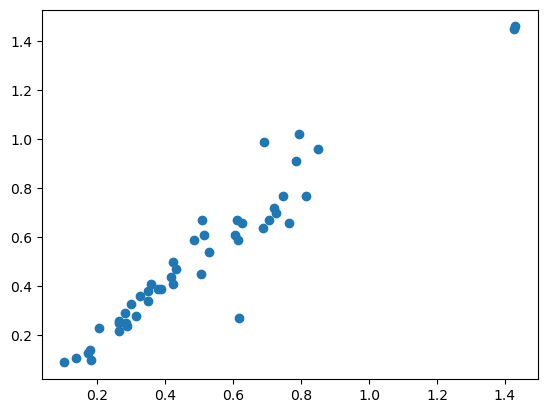

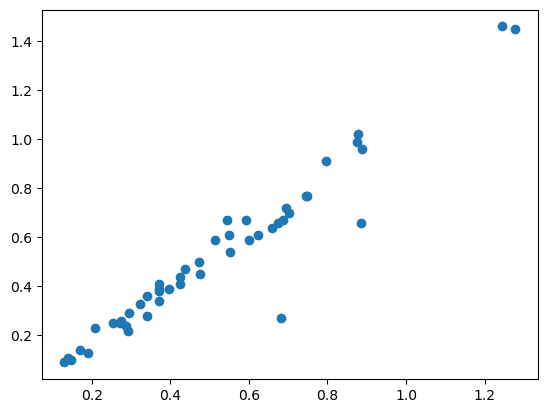

In [24]:
# Let's visualize our results
plt.scatter(y_pred, y_test)
plt.figure()
plt.scatter(rf_y_pred, y_test)

<Axes: title={'center': 'Feature Importance for XGBoost'}>

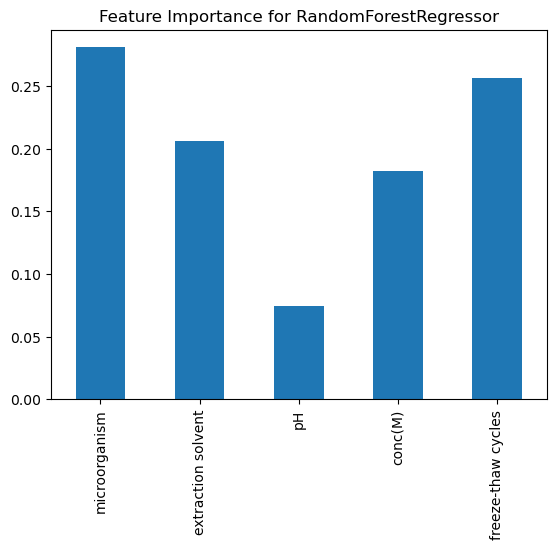

<Figure size 640x480 with 0 Axes>

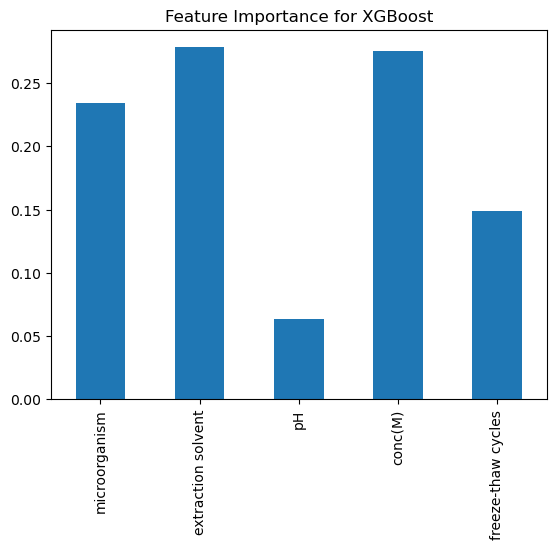

In [38]:
### Feature Importance
# 1. For RandomForestRegressor
rf_importances = rreg.feature_importances_
feature_dict_rf = dict(zip(df.columns, list(rf_importances)))
feature_df_rf = pd.DataFrame(feature_dict_rf, index=[0])
feature_df_rf.T.plot.bar(title="Feature Importance for RandomForestRegressor", legend=False)
plt.figure()
xg_importances = mreg.feature_importances_
feature_dict_xg = dict(zip(df.columns, list(xg_importances)))
feature_df_xg = pd.DataFrame(feature_dict_xg, index=[0])
feature_df_xg.T.plot.bar(title="Feature Importance for XGBoost", legend=False)